In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import TP_dect, real_time_sig_process

In [7]:
pred_path = './Dataset/prediction/'
raw_test_path = './Dataset/test_set.csv'
pred_list  = os.listdir(pred_path)
input_win = 50
output_win = 15
filter_win = 9
half_filter_win = int((filter_win - 1) / 2)
latency,num_slope,num_label = 6,5,output_win
num_input = input_win

In [3]:
pred_sum = []
for pred_file in pred_list:
    path = os.path.join(pred_path, pred_file)
    df = pd.read_csv(path, header=None).to_numpy()
    pred_sum.append(df)

df_test = pd.read_csv(raw_test_path, header=None).to_numpy()
processed_origin = [real_time_sig_process(line)[half_filter_win:-half_filter_win] for line in df_test]
signal_prediction = []
for sig in pred_sum:
    pred_sig = sig.T[0]
    pred_sig = np.concatenate((pred_sig, sig[-1][1:]))
    signal_prediction.append(pred_sig)

prediction = np.concatenate((processed_origin[0][:50], signal_prediction[0]))


In [4]:
origin = processed_origin[0]
origin.shape

(4992,)

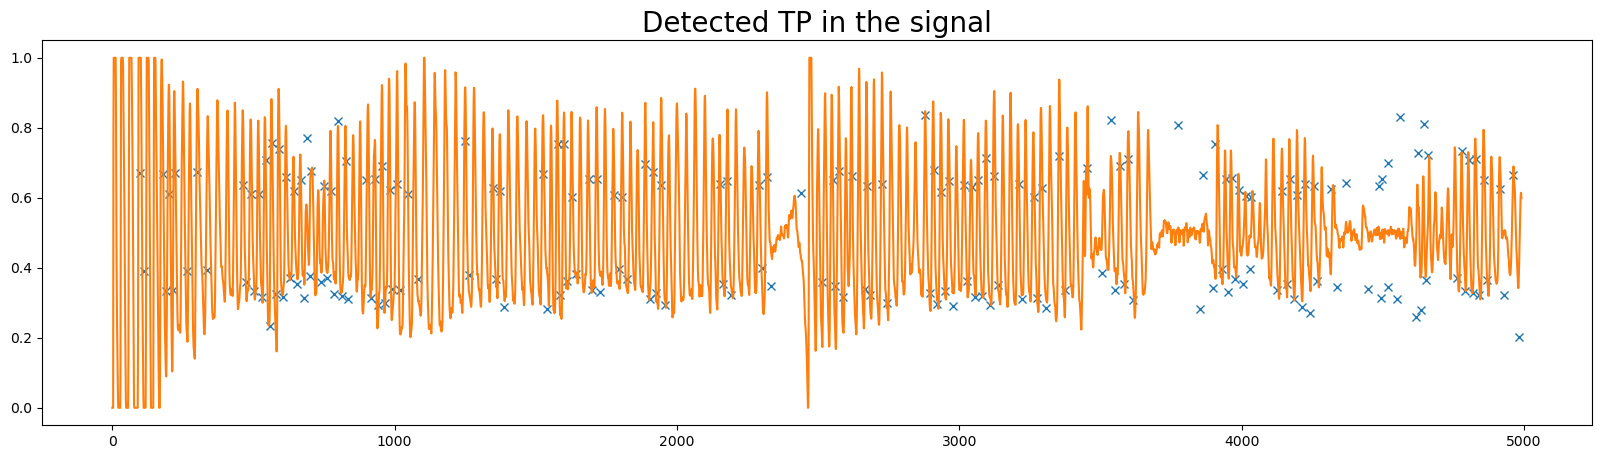

In [8]:
Y_arr = pred_sum[0]
TP_det_list,TP_det_index_list = [],[]
InEx_label,last_i_arr = -1, -2
iterate_Pred = 1
# detect all TP of preprocessed signal
for i_arr in range(len(Y_arr)):
    if i_arr % iterate_Pred != 0:
        continue
    else:
        #start_time = time.time()
        
        ref_TP,label_TP = False,False
        ref_TP,label_TP = TP_dect(Y_arr[i_arr],latency,num_slope,num_label)
        if ref_TP and label_TP * InEx_label == -1:
            TP_pot_index = ref_TP + i_arr + num_input
            TP_pot       = Y_arr[i_arr][ref_TP]
            # save the TP potential
            last_pot_index,last_pot,last_pot_label,last_i_arr = TP_pot_index, TP_pot, label_TP, i_arr
            
        elif (ref_TP and i_arr - last_i_arr == iterate_Pred and label_TP * InEx_label == 1):
            TP_det_index, TP_det, InEx_label = last_pot_index, last_pot, -InEx_label
            TP_det_index_list.append(TP_det_index)
            TP_det_list.append(TP_det)
        
        # if last time has TP, this time no TP, the TP is the 'TP'
        elif (i_arr - last_i_arr == iterate_Pred and InEx_label * last_pot_label == -1):
            TP_det_index, TP_det, InEx_label = last_pot_index, last_pot, -InEx_label
            TP_det_index_list.append(TP_det_index)
            TP_det_list.append(TP_det)
# plot the all detected TP in processed signal
#'''            
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams['figure.dpi'] = 100
plt.plot(TP_det_index_list,TP_det_list,'x')
plt.title('Detected TP in the signal',fontsize = 20)
plt.plot(origin)
plt.show()
#'''

pred_tp, pred_tp_idx = TP_det_list, TP_det_index_list

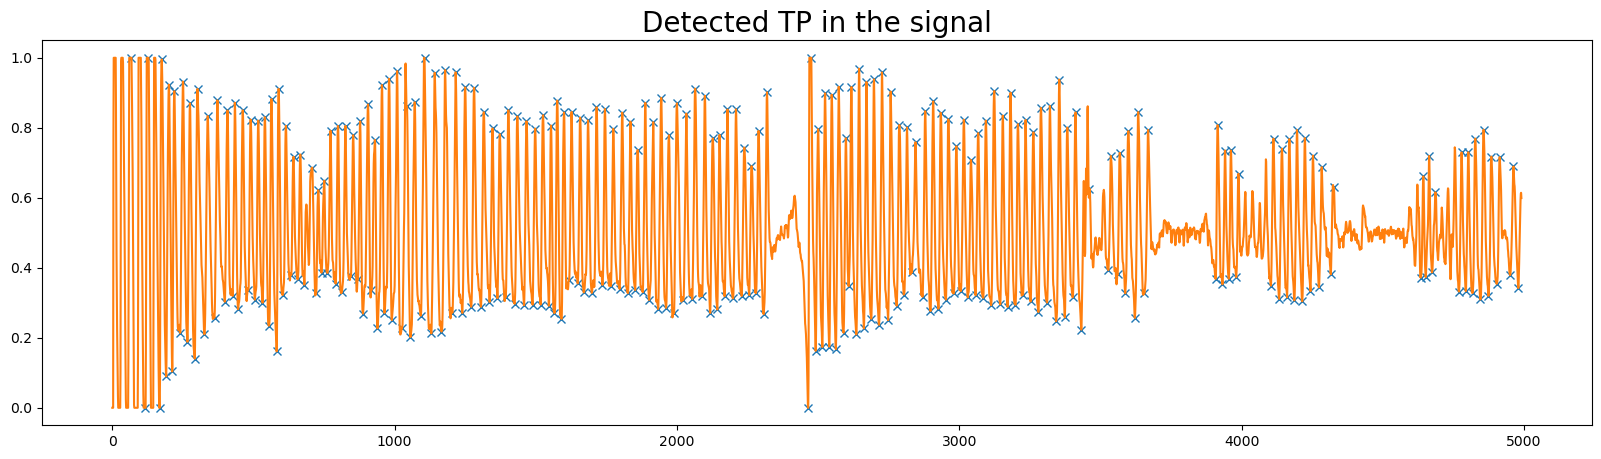

In [9]:
Y_arr = [origin[i_input + num_input : i_input  + num_input + num_label] for i_input in range(4992-num_input-num_label+1)]
TP_det_list,TP_det_index_list = [],[]
InEx_label,last_i_arr = -1, -2
iterate_Pred = 1
# detect all TP of preprocessed signal
for i_arr in range(len(Y_arr)):
    if i_arr % iterate_Pred != 0:
        continue
    else:
        #start_time = time.time()
        
        ref_TP,label_TP = False,False
        ref_TP,label_TP = TP_dect(Y_arr[i_arr],latency,num_slope,num_label)
        if ref_TP and label_TP * InEx_label == -1:
            TP_pot_index = ref_TP + i_arr + num_input
            TP_pot       = Y_arr[i_arr][ref_TP]
            # save the TP potential
            last_pot_index,last_pot,last_pot_label,last_i_arr = TP_pot_index, TP_pot, label_TP, i_arr
            
        elif (ref_TP and i_arr - last_i_arr == iterate_Pred and label_TP * InEx_label == 1):
            TP_det_index, TP_det, InEx_label = last_pot_index, last_pot, -InEx_label
            TP_det_index_list.append(TP_det_index)
            TP_det_list.append(TP_det)
        
        # if last time has TP, this time no TP, the TP is the 'TP'
        elif (i_arr - last_i_arr == iterate_Pred and InEx_label * last_pot_label == -1):
            TP_det_index, TP_det, InEx_label = last_pot_index, last_pot, -InEx_label
            TP_det_index_list.append(TP_det_index)
            TP_det_list.append(TP_det)
# plot the all detected TP in processed signal
#'''            
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams['figure.dpi'] = 100
plt.plot(TP_det_index_list,TP_det_list,'x')
plt.title('Detected TP in the signal',fontsize = 20)
plt.plot(origin)
plt.show()
#'''

origin_tp, origin_tp_idx = TP_det_list, TP_det_index_list

In [10]:
x1 = np.ones_like(origin_tp_idx)*0.9
x2 = np.ones_like(pred_tp_idx)*0.8

In [11]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=origin_tp_idx,
    y=x1,
    mode='markers',
    name='Origin',
    marker=dict(size=5),
))

fig.add_trace(go.Scatter(
    x=pred_tp_idx,
    y=x2,
    mode='markers',
    name='Pred',
    marker=dict(size=5),
))

fig.update_layout(
    yaxis=dict(
        range=[0, 1]
    )
)
fig.show()
